In [23]:
import django
import os
import sys
import shutil

path='../../'

source_file_path = f'{path}.env'

destination_file_path = '.'

shutil.copy(source_file_path, destination_file_path)

from dotenv import dotenv_values

_config = dotenv_values(".env")
_username = _config["username"]

session_file_path = f'{path}{_username}.session'

shutil.copy(session_file_path, destination_file_path)


project_path = path  # Adjust this to your actual project path
sys.path.append(project_path)
os.environ.setdefault('DJANGO_SETTINGS_MODULE', 'oogway.settings')
django.setup()


In [24]:
import warnings

# Disable all warnings
warnings.filterwarnings("ignore")

In [25]:
from django.db.models import Sum
from django.db.models.functions import TruncMonth
from PostAnalyzer.models import Predict
from asgiref.sync import sync_to_async
# Django ORM equivalent
results = await sync_to_async(
        lambda: list(
            Predict.objects
            .select_related('post__channel')
            .annotate(month=TruncMonth('date'))
            .values('post__channel__name', 'month')
            .annotate(total_profit=Sum('profit'))
            .order_by('month', 'post__channel__name')
        )
    )()

for result in results:
    print(result['post__channel__name'], result['month'], result['total_profit'])

# results


ALI_BEY 2023-11-01 00:00:00+03:30 -2187.6148200000007
FEYZIAN 2023-11-01 00:00:00+03:30 42.99122999999999
RASTAD 2023-11-01 00:00:00+03:30 1.619299999999999
ALI_BEY 2023-12-01 00:00:00+03:30 -1087.8490100000001
FEYZIAN 2023-12-01 00:00:00+03:30 -343.2853999999999
ALI_BEY 2024-01-01 00:00:00+03:30 -2.035190000000018
FEYZIAN 2024-01-01 00:00:00+03:30 -113.16239000000004
RASTAD 2024-01-01 00:00:00+03:30 -78.27520999999996
ALI_BEY 2024-02-01 00:00:00+03:30 -1069.81864
FEYZIAN 2024-02-01 00:00:00+03:30 153.73805
RASTAD 2024-02-01 00:00:00+03:30 104.53559
ALI_BEY 2024-03-01 00:00:00+03:30 -337.86951
FEYZIAN 2024-03-01 00:00:00+03:30 74.9756
RASTAD 2024-03-01 00:00:00+03:30 -59.95549
ALI_BEY 2024-04-01 00:00:00+03:30 -338.84918
FEYZIAN 2024-04-01 00:00:00+03:30 77.9062
RASTAD 2024-04-01 00:00:00+03:30 -141.26666999999998
ALI_BEY 2024-05-01 00:00:00+03:30 40.51079999999997
FEYZIAN 2024-05-01 00:00:00+03:30 -223.99227
RASTAD 2024-05-01 00:00:00+03:30 -13.729139999999996
ALI_BEY 2024-06-01 00:00

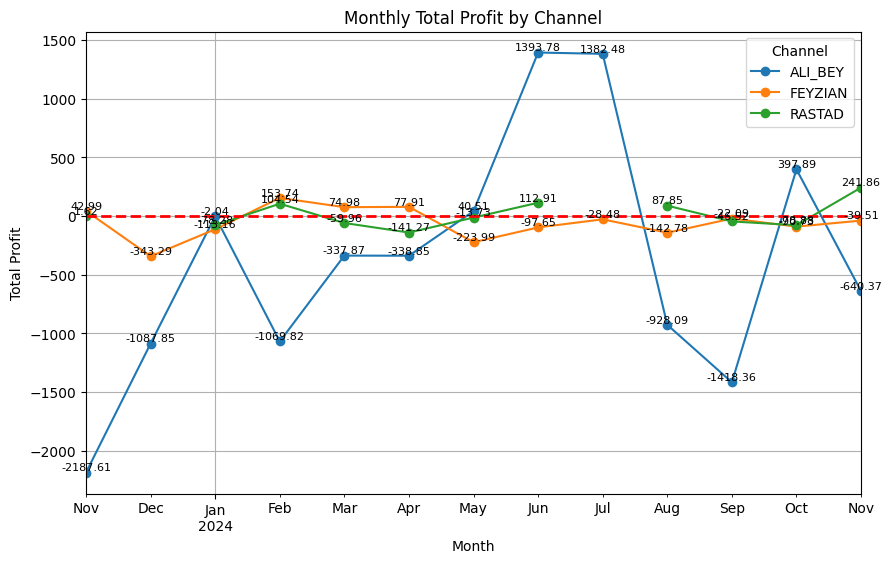

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

# Sample data to simulate results from Django ORM
# Assuming `results` has the fields `channel_name`, `month`, and `total_profit`


# Convert the data to a DataFrame
df = pd.DataFrame(results)

# Pivot the DataFrame to format it for plotting
pivot_df = df.pivot(index='month', columns='post__channel__name', values='total_profit')

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
pivot_df.plot(kind='line', marker='o', ax=ax)

# Adding a high contrast horizontal line at y=0
ax.axhline(y=0, color='red', linestyle='--', linewidth=2)
# ax.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Baseline (y=0)')

# Setting labels, title, and legend
plt.title('Monthly Total Profit by Channel')
plt.xlabel('Month')
plt.ylabel('Total Profit')
plt.legend(title='Channel')
plt.grid()
for channel in pivot_df.columns:
    for month, value in pivot_df[channel].items():
        if pd.notnull(value):  # Only annotate non-null values
            ax.text(month, value, f'{value:.2f}', ha='center', va='bottom', fontsize=8)

plt.show()




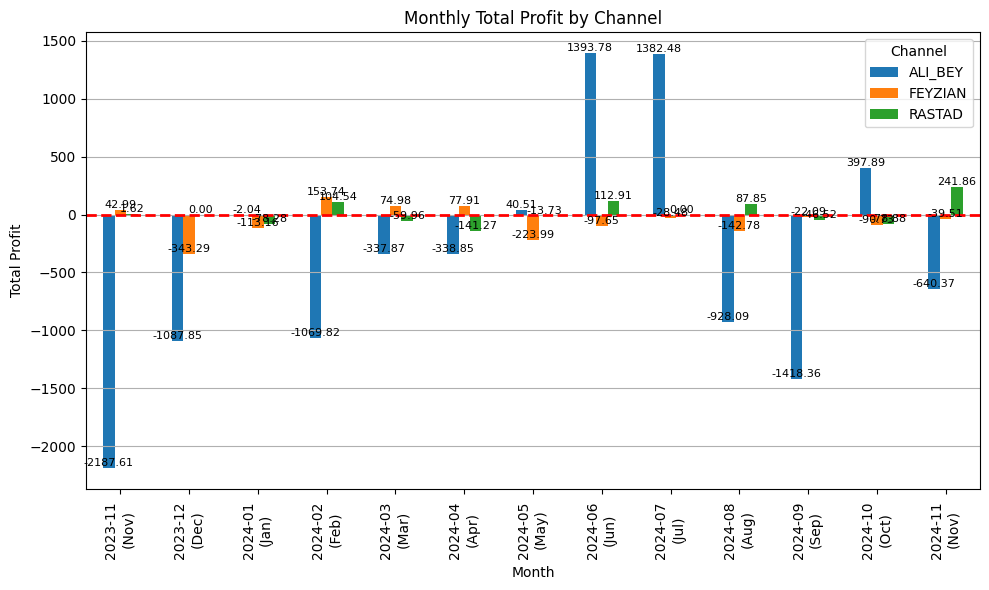

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime


# Convert the data to a DataFrame
df = pd.DataFrame(results)
df['month'] = pd.to_datetime(df['month']).dt.strftime('%Y-%m \n(%b)')
# df['month'] = pd.to_datetime(df['month'])

# Sort by month to ensure proper order
df = df.sort_values(by='month')
# Pivot the DataFrame to format it for plotting
pivot_df = df.pivot(index='month', columns='post__channel__name', values='total_profit')

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
pivot_df.plot(kind='bar', ax=ax)

# Adding a high contrast horizontal line at y=0
ax.axhline(y=0, color='red', linestyle='--', linewidth=2)

# Setting labels, title, and legend
plt.title('Monthly Total Profit by Channel')
plt.xlabel('Month')
plt.ylabel('Total Profit')
plt.legend(title='Channel')
plt.grid(axis='y')  # Grid only for y-axis to improve readability

# Adding data labels to each bar
for p in ax.patches:
    height = p.get_height()
    if pd.notnull(height):  # Only annotate non-null values
        ax.text(
            p.get_x() + p.get_width() / 2,
            height,
            f'{height:.2f}',
            ha='center',
            va='bottom',
            fontsize=8
        )

plt.tight_layout()
plt.show()


In [63]:


from django.db.models import Sum, Count
from PostAnalyzer.models import Predict
from asgiref.sync import sync_to_async



total_results = await sync_to_async(
        lambda: list(
            Predict.objects
                    .select_related('post__channel')
                    .values('post__channel__name')
                    .annotate(total_profit=Sum('profit'))
                    .order_by('post__channel__name')
                    )
    )()


total_results


[{'post__channel__name': 'ALI_BEY', 'total_profit': -4796.20540000001},
 {'post__channel__name': 'FEYZIAN', 'total_profit': -752.0642099999997},
 {'post__channel__name': 'RASTAD', 'total_profit': 130.14142000000015}]

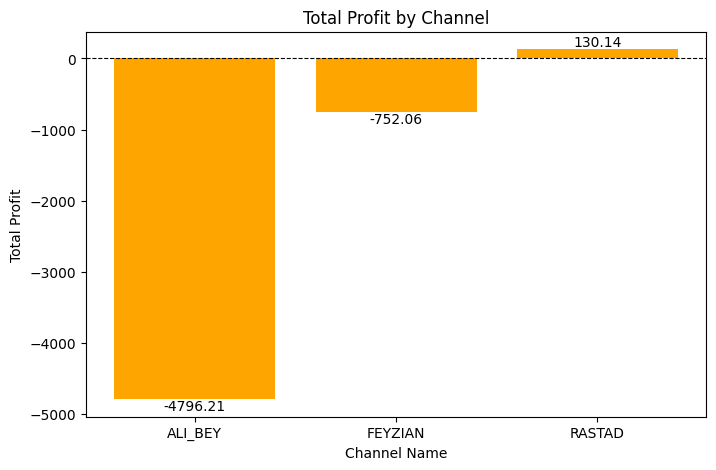

In [65]:
import matplotlib.pyplot as plt

df = pd.DataFrame(total_results)
# Assuming df contains the data with columns 'post__channel__name' and 'total_profit'
plt.figure(figsize=(8, 5))
bars = plt.bar(df['post__channel__name'], df['total_profit'], color='orange')

# Add value labels on each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Position x in the center of the bar
        height,  # Position y at the height of the bar
        f'{height:.2f}',  # Format value with 2 decimal places
        ha='center',  # Horizontal alignment center
        va='bottom' if height >= 0 else 'top',  # Adjust vertical alignment for negative values
    )

plt.xlabel('Channel Name')
plt.ylabel('Total Profit')
plt.title('Total Profit by Channel')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Add a line at 0 for reference
plt.show()


In [30]:
from django.db.models import Sum, Count
from PostAnalyzer.models import Predict
from asgiref.sync import sync_to_async

# Define an async function
gross_loss = await sync_to_async(
    lambda: Predict.objects.filter(
        status__name__in=['FAILED WITH PROFIT', 'FAILED']
    ).aggregate(
        failed_profit=Sum('profit'),
        failed_count=Count('id')
    )
)()

gross_loss


{'failed_profit': -24653.111890000022, 'failed_count': 831}

In [31]:
from django.db.models import Sum, Count
from PostAnalyzer.models import Predict
from asgiref.sync import sync_to_async

# Define an async function
gross_win = await sync_to_async(
    lambda: Predict.objects.filter(
        status__name__in=['SUCCESS', 'FULLTARGET']
    ).aggregate(
        win_profit=Sum('profit'),
        win_count=Count('id')
    )
)()

gross_win


{'win_profit': 19234.983700000008, 'win_count': 392}

In [32]:
from django.db.models import Sum, Count, Case, When, IntegerField, FloatField
from PostAnalyzer.models import Predict
from asgiref.sync import sync_to_async

# Define an async function
result = await sync_to_async(
    lambda: Predict.objects.filter(**{}).aggregate(
        gross_loss=Sum(
            Case(
                When(status__name__in=['FAILED WITH PROFIT', 'FAILED'], then='profit'),
                output_field=FloatField()
            )
        ),
        loss_count=Count(
            Case(
                When(status__name__in=['FAILED WITH PROFIT', 'FAILED'], then=1),
                output_field=IntegerField()
            )
        ),
        gross_profit=Sum(
            Case(
                When(status__name__in=['SUCCESS', 'FULLTARGET'], then='profit'),
                output_field=FloatField()
            )
        ),
        win_count=Count(
            Case(
                When(status__name__in=['SUCCESS', 'FULLTARGET'], then=1),
                output_field=IntegerField()
            )
        ),
        total_gross=Sum('profit', output_field=FloatField()),  # Total profit for all statuses
        total_count=Count('id', output_field=IntegerField()) 
    )
)()

gross_loss = result['gross_loss']
loss_count = result['loss_count']
gross_profit = result['gross_profit']
win_count = result['win_count']
total_count = result['total_count']
total_gross = result['total_gross']

loss_rate = loss_count/total_count
win_rate = win_count/total_count
average_loss = gross_loss/loss_count
average_win = gross_profit/win_count
expectancy = (win_rate * average_win)-(abs(loss_rate * average_loss))
profit_factor =  abs(gross_profit/gross_loss if gross_loss else 1)
payoff_ratio = abs(average_win/average_loss if average_loss else 1)

print(f'total_count: {total_count}')
print(f'total_gross: {total_gross}')
print(f'total_count: {total_count}')
print(f'gross_loss: {gross_loss}')
print(f'loss_count: {loss_count}')
print(f'gross_profit: {gross_profit}')
print(f'win_count: {win_count}')
print(f'loss_rate: {loss_rate}')
print(f'win_rate: {win_rate}')
print(f'average_loss: {average_loss}')
print(f'average_win: {average_win}')
print(f'expectancy: {expectancy}')
print(f'profit_factor: {profit_factor}')
print(f'payoff_ratio: {payoff_ratio}')


total_count: 1341
total_gross: -5418.128190000009
total_count: 1341
gross_loss: -24653.111890000022
loss_count: 831
gross_profit: 19234.983700000008
win_count: 392
loss_rate: 0.6196868008948546
win_rate: 0.2923191648023863
average_loss: -29.66680131167271
average_win: 49.06883596938778
expectancy: -4.040364049217011
profit_factor: 0.7802253843581607
payoff_ratio: 1.653998200004162


In [33]:
from django.db.models import Sum, Count
from PostAnalyzer.models import Predict
from asgiref.sync import sync_to_async

# Define an async function to get sum and count of profits for each status
result = await sync_to_async(
    lambda: list(
        Predict.objects.values('status__name')
        .annotate(
            total_profit=Sum('profit'),
            profit_count=Count('id')
        )
        .order_by('status__name')
    )
)()

result


[{'status__name': 'CANCELED', 'total_profit': 0.0, 'profit_count': 48},
 {'status__name': 'FAILED',
  'total_profit': -8201.409870000005,
  'profit_count': 305},
 {'status__name': 'FAILED WITH PROFIT',
  'total_profit': -16451.702019999997,
  'profit_count': 526},
 {'status__name': 'FULLTARGET',
  'total_profit': 13790.492880000003,
  'profit_count': 317},
 {'status__name': 'PENDING', 'total_profit': 0.0, 'profit_count': 14},
 {'status__name': 'SUCCESS',
  'total_profit': 5444.490819999999,
  'profit_count': 75},
 {'status__name': 'WAIT MANY DAYS', 'total_profit': 0.0, 'profit_count': 56}]

In [34]:
from asgiref.sync import sync_to_async
from PostAnalyzer.models import TakeProfitTarget
from django.db.models import Count, Max

async def get_tp_num_counts():
    # Step 1: Perform the inner query, grouping by predict_id, counting entries, and getting max profit
    subquery = await sync_to_async(
        lambda: list(
            TakeProfitTarget.objects.filter(active=True)
            .values('predict_id')
            .annotate(
                tp_index=Count('id'),            
                max_profit=Max('profit')        
            )
        )
    )()

    
    tp_result = {}
    for entry in subquery:
        tp_index = entry['tp_index']
        max_profit = entry['max_profit']
        if tp_index not in tp_result:
            tp_result[tp_index] = {'count': 0, 'total_profit': 0}
        tp_result[tp_index]['count'] += 1
        tp_result[tp_index]['total_profit'] += max_profit

    
    result = [
        {'tp_index': tp_index, 'count': data['count'], 'total_profit': data['total_profit']}
        for tp_index, data in sorted(tp_result.items())
    ]
    
    return result

await get_tp_num_counts()


[{'tp_index': 1, 'count': 189, 'total_profit': 1382.6737400000009},
 {'tp_index': 2, 'count': 129, 'total_profit': 1880.8734000000004},
 {'tp_index': 3, 'count': 154, 'total_profit': 3329.6412500000006},
 {'tp_index': 4, 'count': 81, 'total_profit': 2629.576579999999},
 {'tp_index': 5, 'count': 177, 'total_profit': 5103.396810000003},
 {'tp_index': 6, 'count': 34, 'total_profit': 1874.91969},
 {'tp_index': 7, 'count': 36, 'total_profit': 2137.81776},
 {'tp_index': 8, 'count': 34, 'total_profit': 2654.6051799999996},
 {'tp_index': 9, 'count': 26, 'total_profit': 2314.4223199999997},
 {'tp_index': 10, 'count': 22, 'total_profit': 1885.0620899999997},
 {'tp_index': 11, 'count': 25, 'total_profit': 2333.79864},
 {'tp_index': 12, 'count': 16, 'total_profit': 1630.7581100000002},
 {'tp_index': 13, 'count': 7, 'total_profit': 702.16742},
 {'tp_index': 14, 'count': 5, 'total_profit': 530.9097399999999},
 {'tp_index': 15, 'count': 7, 'total_profit': 868.9122499999999},
 {'tp_index': 16, 'count'

In [35]:
from django.db.models import Count, Case, When, Value, CharField
from PostAnalyzer.models import Channel
from asgiref.sync import sync_to_async

async def status_stat():
    queryset = await sync_to_async(
        lambda: list(
            Channel.objects
            .filter(
                post__predict__status__name__in=['FAILED', 'FAILED WITH PROFIT', 'SUCCESS', 'FULLTARGET']
            )
            .annotate(
                status_group=Case(
                    When(post__predict__status__name__in=['FAILED', 'FAILED WITH PROFIT'], then=Value('FAILED_GROUP')),
                    When(post__predict__status__name__in=['SUCCESS', 'FULLTARGET'], then=Value('SUCCESS_GROUP')),
                    output_field=CharField(),
                ),
                predict_count=Count('post__predict', distinct=True),
            )
            .values('channel_id', 'name', 'status_group', 'predict_count')
            .order_by('channel_id', 'status_group')
        )
    )()
    return queryset

# Call the async function
status_stat_result =  await status_stat()
status_stat_result


[{'channel_id': '1511133584',
  'name': 'RASTAD',
  'status_group': 'FAILED_GROUP',
  'predict_count': 208},
 {'channel_id': '1511133584',
  'name': 'RASTAD',
  'status_group': 'SUCCESS_GROUP',
  'predict_count': 165},
 {'channel_id': '1566206468',
  'name': 'FEYZIAN',
  'status_group': 'FAILED_GROUP',
  'predict_count': 207},
 {'channel_id': '1566206468',
  'name': 'FEYZIAN',
  'status_group': 'SUCCESS_GROUP',
  'predict_count': 84},
 {'channel_id': '1696979096',
  'name': 'ALI_BEY',
  'status_group': 'FAILED_GROUP',
  'predict_count': 416},
 {'channel_id': '1696979096',
  'name': 'ALI_BEY',
  'status_group': 'SUCCESS_GROUP',
  'predict_count': 143}]

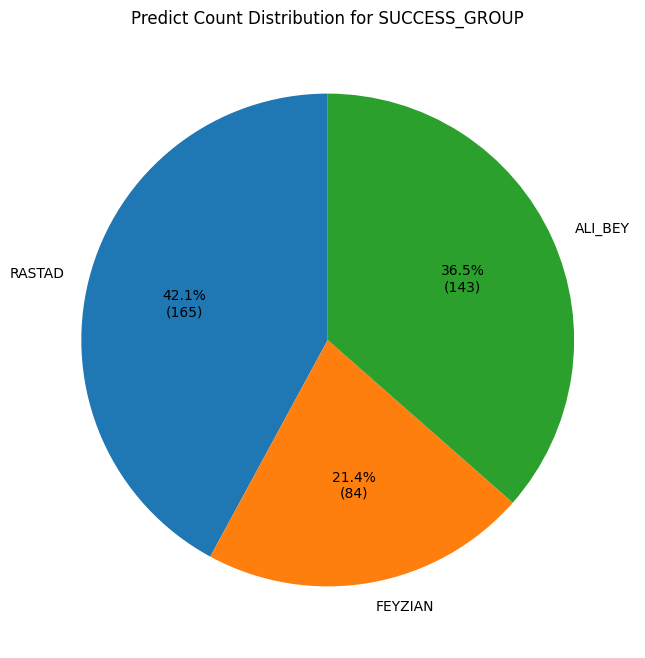

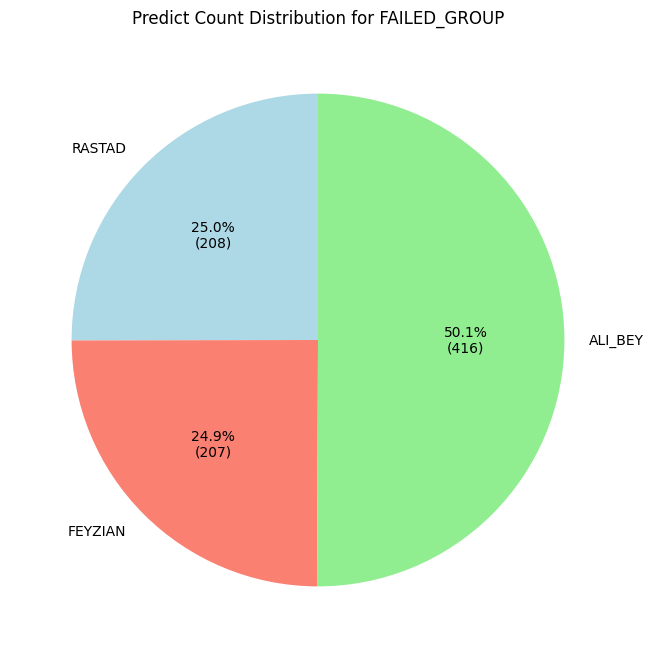

In [50]:
import pandas as pd
import matplotlib.pyplot as plt



# Convert data to DataFrame
df = pd.DataFrame(status_stat_result)

# Filter data for 'SUCCESS_GROUP'
success_group = df[df['status_group'] == 'SUCCESS_GROUP']

# Filter data for 'FAILED_GROUP'
failed_group = df[df['status_group'] == 'FAILED_GROUP']

# Prepare data for pie chart: SUCCESS_GROUP
labels_success = success_group['name']
sizes_success = success_group['predict_count']

# Prepare data for pie chart: FAILED_GROUP
labels_failed = failed_group['name']
sizes_failed = failed_group['predict_count']

# Function to display both percentage and value
def autopct_format(pct, all_values):
    absolute = int(pct / 100. * sum(all_values))
    return f"{pct:.1f}%\n({absolute})"

# Plot pie chart for SUCCESS_GROUP
plt.figure(figsize=(8, 8))
plt.pie(
    sizes_success,
    labels=labels_success,
    autopct=lambda pct: autopct_format(pct, sizes_success),
    startangle=90
)
plt.title('Predict Count Distribution for SUCCESS_GROUP')
plt.show()

# Plot pie chart for FAILED_GROUP
plt.figure(figsize=(8, 8))
plt.pie(
    sizes_failed,
    labels=labels_failed,
    autopct=lambda pct: autopct_format(pct, sizes_failed),
    startangle=90,
    colors=['lightblue', 'salmon', 'lightgreen']
)
plt.title('Predict Count Distribution for FAILED_GROUP')
plt.show()


In [56]:
from django.db.models import Count, Case, When, Value, CharField, F
from PostAnalyzer.models import Channel, Post, Predict, PostStatus
from asgiref.sync import sync_to_async


# Define the async function
async def get_channel_data_with_totals():
    # Subquery to get total predictions per channel
    result = await sync_to_async(
        lambda: list(
            Predict.objects
            .filter(post__channel__isnull=False)
            .annotate(channel_id=F('post__channel__channel_id'),channel_name=F('post__channel__name'))
            .values('channel_id', 'channel_name')
            .annotate(total_count=Count('id'))
        )
    )()
    
    return result

# Call the async function
channel_data_with_totals = await get_channel_data_with_totals()
channel_data_with_totals




[{'channel_id': '1511133584', 'channel_name': 'RASTAD', 'total_count': 381},
 {'channel_id': '1566206468', 'channel_name': 'FEYZIAN', 'total_count': 362},
 {'channel_id': '1696979096', 'channel_name': 'ALI_BEY', 'total_count': 598}]

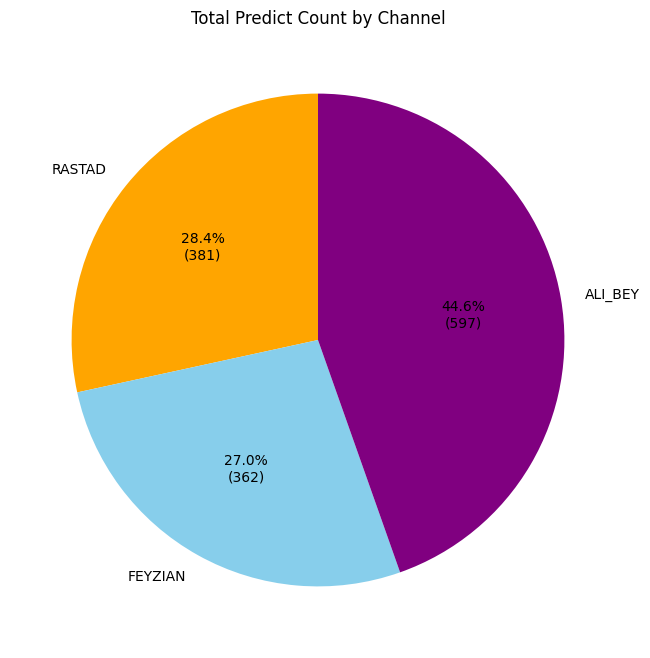

In [61]:
# Data for the pie chart

# Convert to DataFrame
df = pd.DataFrame(channel_data_with_totals)

# Prepare data for pie chart
labels = df['channel_name']
sizes = df['total_count']

# Function to display both percentage and value
def autopct_format(pct, all_values):
    absolute = int(pct / 100. * sum(all_values))
    return f"{pct:.1f}%\n({absolute})"

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    sizes,
    labels=labels,
    autopct=lambda pct: autopct_format(pct, sizes),
    startangle=90,
    colors=['orange','skyblue','purple']
)
plt.title('Total Predict Count by Channel')
plt.show()



In [ ]:
# Input data
status_data = [
    {'channel_id': '1511133584', 'name': 'RASTAD', 'status_group': 'FAILED_GROUP', 'predict_count': 65},
    {'channel_id': '1511133584', 'name': 'RASTAD', 'status_group': 'SUCCESS_GROUP', 'predict_count': 50},
    {'channel_id': '1566206468', 'name': 'FEYZIAN', 'status_group': 'FAILED_GROUP', 'predict_count': 207},
    {'channel_id': '1566206468', 'name': 'FEYZIAN', 'status_group': 'SUCCESS_GROUP', 'predict_count': 84}
]

total_data = [
    {'channel_id': '1566206468', 'total_count': 362},
    {'channel_id': '1511133584', 'total_count': 117}
]

# Initialize a dictionary to hold the results
result = {}

# Process the status data to accumulate counts
for entry in status_data:
    channel_id = entry['channel_id']
    if channel_id not in result:
        result[channel_id] = {
            'channel_id': channel_id,
            'name': entry['name'],  # Capture the name
            'FAILED_GROUP': 0,
            'SUCCESS_GROUP': 0
        }
    
    # Accumulate the counts
    if entry['status_group'] == 'FAILED_GROUP':
        result[channel_id]['FAILED_GROUP'] += entry['predict_count']
    elif entry['status_group'] == 'SUCCESS_GROUP':
        result[channel_id]['SUCCESS_GROUP'] += entry['predict_count']

# Process the total data to combine with the result
for entry in total_data:
    channel_id = entry['channel_id']
    if channel_id in result:
        result[channel_id]['total_count'] = entry['total_count']

# Convert the result to a list
final_result = list(result.values())

# Output the final result
print(final_result)

[{'channel_id': '1511133584', 'name': 'RASTAD', 'FAILED_GROUP': 65, 'SUCCESS_GROUP': 50, 'total_count': 117}, {'channel_id': '1566206468', 'name': 'FEYZIAN', 'FAILED_GROUP': 207, 'SUCCESS_GROUP': 84, 'total_count': 362}]
